# Making Decision Tree with Features from Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Loading Data**

In [2]:
datasets=load_iris()

In [3]:
X=pd.DataFrame(data=datasets.data,columns=datasets.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# ytarget=['species']
y=pd.DataFrame(data=datasets.target,columns=['species'])
y.tail()

,species
145,2
146,2
147,2
148,2
149,2


In [5]:
yy = y['species'].value_counts()
yy

0    50
1    50
2    50
Name: species, dtype: int64

**Using Train Test Split**

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
Xt,Xtest,yt,ytest=train_test_split(X,y,test_size=0.2,random_state=45)

In [8]:
Xt.shape

(120, 4)

In [9]:
yt.shape

(120, 1)

**Importing DecisionTree Regressor**

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
DT=DecisionTreeRegressor()
DT.fit(Xt,yt)

DecisionTreeRegressor()

In [12]:
ypr=DT.predict(Xtest)

**Evaluation**

In [13]:
from sklearn.metrics import accuracy_score,r2_score

In [14]:
accuracy_score(ypr,ytest)

0.9666666666666667

In [15]:
r2_score(ypr,ytest)

0.9545454545454546

**Importing DecisionTree Classifier**

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
DTC=DecisionTreeClassifier()
DTC.fit(Xt,yt)

DecisionTreeClassifier()

In [18]:
ypre=DTC.predict(Xtest)

In [19]:
accuracy_score(ytest,ypre)

0.9666666666666667

In [20]:
r2_score(ypre,ytest)

0.9545454545454546

**Using Shorter Method**

In [21]:
import pandas as pd
import seaborn as sns

In [22]:
data=sns.load_dataset('iris')

In [23]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [24]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
Y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [26]:
from sklearn.model_selection import train_test_split


In [27]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,random_state=45)

In [28]:
Xtrain

,sepal_length,sepal_width,petal_length,petal_width
21,5.1,3.7,1.5,0.4
111,6.4,2.7,5.3,1.9
62,6.0,2.2,4.0,1.0
117,7.7,3.8,6.7,2.2
37,4.9,3.6,1.4,0.1
...,...,...,...,...
68,6.2,2.2,4.5,1.5
95,5.7,3.0,4.2,1.2
32,5.2,4.1,1.5,0.1
124,6.7,3.3,5.7,2.1


In [29]:
#model selection
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(max_depth=3,criterion="entropy")  #for hyperparameter pruning add parametes like max_depth,etc
DT.fit(Xtrain,Ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [30]:
ypred=DT.predict(Xtest)
ypred

array(['setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'virginica', 'virginica', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'versicolor', 'setosa',
       'virginica', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'setosa', 'setosa', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor'], dtype=object)

In [31]:
from sklearn.metrics import accuracy_score,classification_report

In [32]:
score=accuracy_score(ypred,Ytest)
print(score)

0.9555555555555556


In [33]:
report=classification_report(ypred,Ytest)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.87      0.93        15
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



[Text(0.375, 0.875, 'X[3] <= 0.75\nentropy = 1.583\nsamples = 105\nvalue = [33, 37, 35]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.65\nentropy = 0.999\nsamples = 72\nvalue = [0, 37, 35]'),
 Text(0.25, 0.375, 'X[2] <= 5.35\nentropy = 0.183\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.375, 'X[2] <= 5.05\nentropy = 0.31\nsamples = 36\nvalue = [0, 2, 34]'),
 Text(0.625, 0.125, 'entropy = 0.811\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 28\nvalue = [0, 0, 28]')]

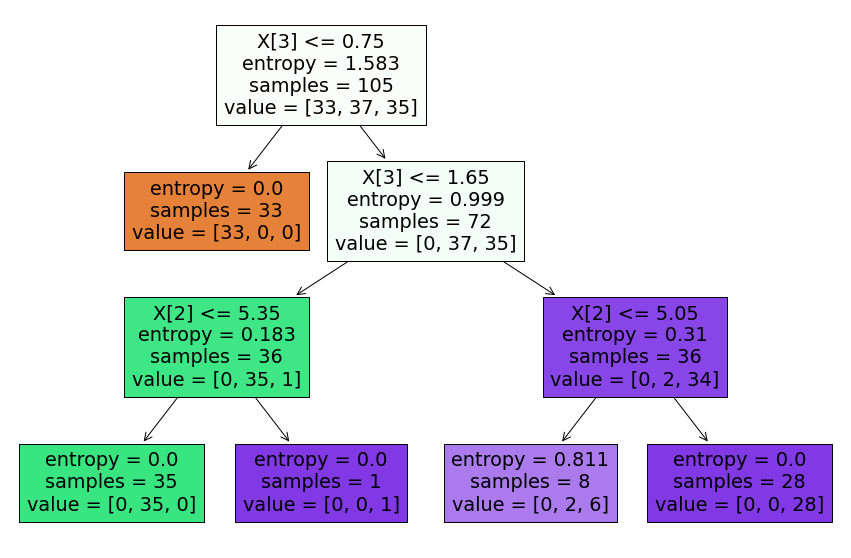

In [34]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
tree.plot_tree(DT,filled=True)